In [1]:
import pandas as pd                #data manipulation 
import numpy as np                 #data manipulation 
import matplotlib.pyplot as plt    #data visualization
import seaborn as sns              #data visualization
import math
%matplotlib inline
import warnings
from astropy.io import fits
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [2]:
train = pd.read_csv('cleaned.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,0


In [3]:
# EDA analysis
sns.set(style="dark",font_scale=1.25)

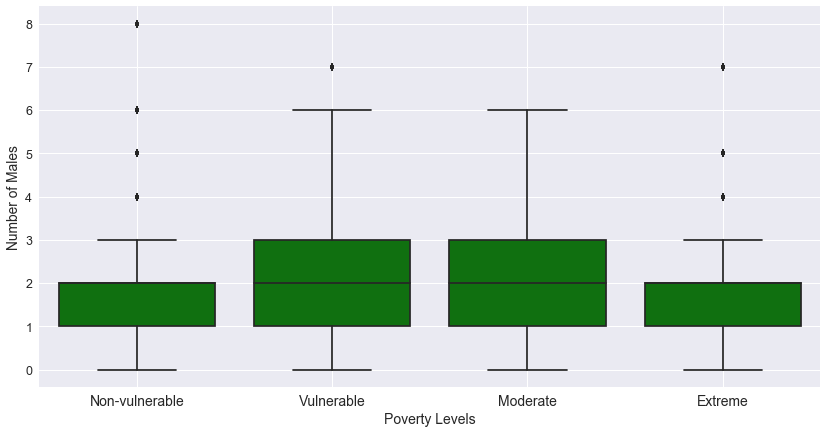

In [4]:
# Male, Female, Total No of People in Household Analysis
def number_people_Boxplot(feature, palette, xlabel, ylabel, title ):    
    #sns.set_palette(palette)
    ax = sns.boxplot(train.Target, train[feature], color = 'green')
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlabel("Poverty Levels", fontsize = 14)
    plt.title(title)
    plt.xticks([0,1,2,3],['Non-vulnerable', 'Vulnerable', 'Moderate', 'Extreme'], rotation = 0, fontsize = 14);
                   
plt.figure(figsize = (14,7))
#plt.subplot(2,2, 1)
number_people_Boxplot('r4h3', 'bright', '', 'Number of Males','')

# plt.savefig("no_of_males.png")
#plt.subplot(2,2, 2)
#number_people_Boxplot('r4m3','cool', '', 'Number of Females','')
#plt.savefig("no_of_females.png")
#plt.figure(2, figsize = (14,7))

#plt.subplot(2,2, 3)
#number_people_Boxplot('r4t3','Set3', '', 'No of Persons','No of Persons in the house')



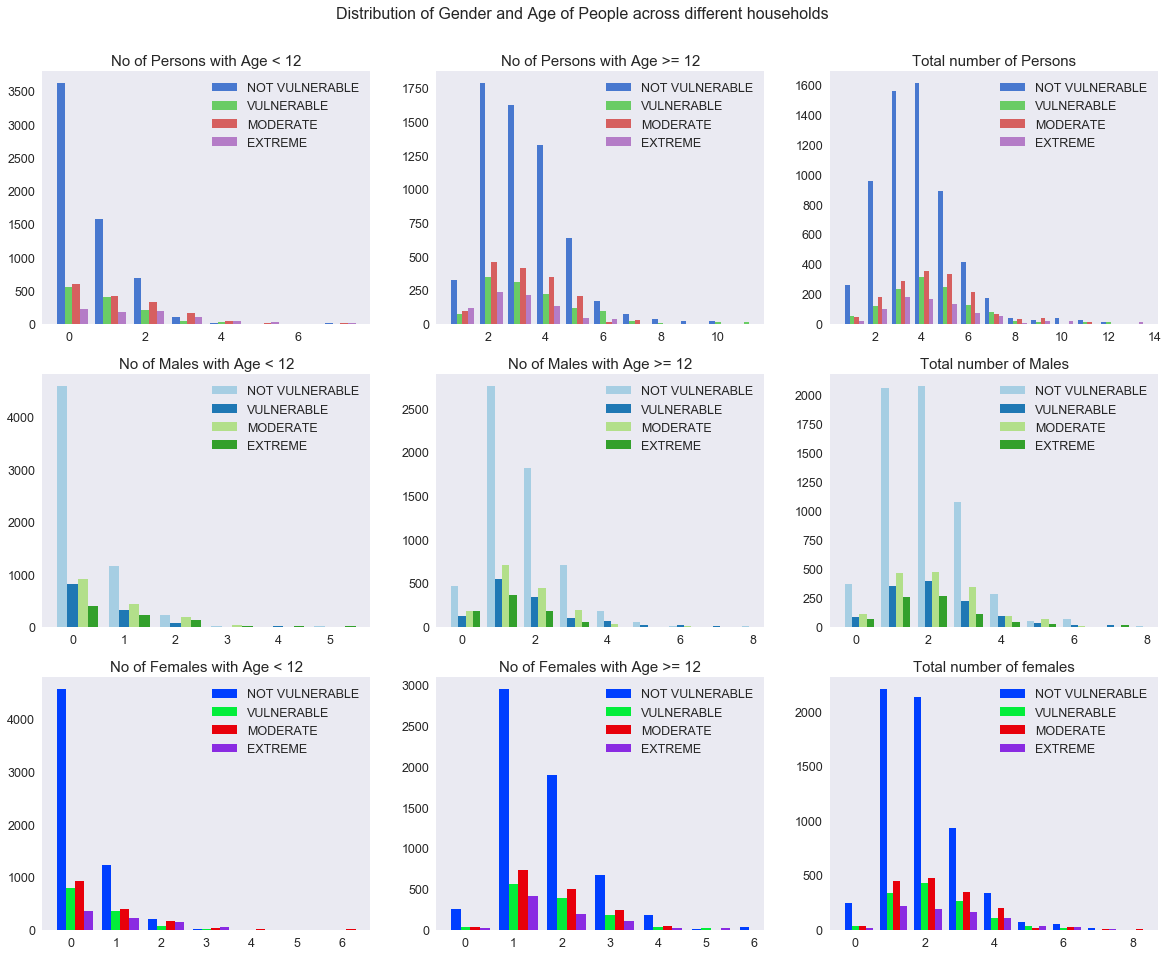

In [5]:
def age_gender_dist(key):
    X = train[['Target', key]].groupby(['Target', key])
    data = X['Target'].agg('count').unstack('Target')
    plt.bar(data.index-0.2, data[0], label = 'NOT VULNERABLE', width=0.2);
    plt.bar(data.index, data[1], label = 'VULNERABLE', width=0.2);
    plt.bar(data.index+0.2, data[2], label = 'MODERATE', width=0.2);
    plt.bar(data.index+0.4, data[3], label = 'EXTREME', width=0.2);
    plt.legend(loc = 'upper right')

    
plt.figure(1, figsize = (20,15))
plt.suptitle('Distribution of Gender and Age of People across different households', fontsize=16)

sns.set_palette('muted')
plt.subplot(3, 3, 1)
age_gender_dist('r4t1')
plt.title("No of Persons with Age < 12");

plt.subplot(3, 3, 2)
sns.set_palette('muted')
age_gender_dist('r4t2') 
plt.title("No of Persons with Age >= 12");

plt.subplot(3, 3, 3)
sns.set_palette('muted')
age_gender_dist('r4t3') 
plt.title("Total number of Persons");

sns.set_palette('Paired')
plt.subplot(3, 3, 4)
age_gender_dist('r4h1')
plt.title("No of Males with Age < 12");

plt.subplot(3, 3,5)
sns.set_palette('Paired')
age_gender_dist('r4h2') 
plt.title("No of Males with Age >= 12");

plt.subplot(3, 3, 6)
sns.set_palette('Paired')
age_gender_dist('r4h3') 
plt.title("Total number of Males");

sns.set_palette('bright')
plt.subplot(3, 3, 7)
age_gender_dist('r4m1')
plt.title("No of Females with Age < 12");

plt.subplot(3, 3, 8)
sns.set_palette('bright')
age_gender_dist('r4m2') 
plt.title("No of Females with Age >= 12");

plt.subplot(3, 3, 9)
sns.set_palette('bright')
age_gender_dist('r4m3') 
plt.title("Total number of females");

plt.subplots_adjust(top=0.92)

In [6]:
#age group distribution, hogar_nin, hogar_adult, hogar_mayor
def age_group_distribution(features, t1, palette1, palette2, col):
    
#     plt.subplot(4, 2, col)
#     sns.countplot(x = features, data = train, palette = palette1)
#     plt.xlabel(t1)
#     plt.title("Distibution of " + t1)
    
    #plt.subplot(4, 2, col+1)
    ax = sns.barplot(x= features, y= features, hue='Target', data = train, estimator=lambda x: len(x) / len(train) * 100, palette = palette2);
    handles,_ = ax.get_legend_handles_labels()
    plt.xlabel(t1)
    plt.ylabel("Percentage", fontsize = 14)
    #plt.title("Poverty Levels based on Distibution of " + t1)
    ax.legend(handles, ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME'], loc = 'upper right');

sns.set_style('white')
plt.figure(figsize = (14,6))
#age_group_distribution('hogar_nin', "No of Childern (0-19 age) in household", 'terrain', 'YlOrRd_r', 1)
#plt.savefig("no_of_childern.png")
#age_group_distribution('hogar_adul', "No of Adults in household", 'afmhot', 'terrain', 3)
#plt.savefig("no_of_adults.png")
# age_group_distribution('hogar_mayor', "No of Elders (>= 65) in household", 'Set2', 'muted', 5)
# plt.savefig("no_of_elders.png")

#age_group_distribution('hogar_total', "Total People in household", 'cool', 'rocket_r', 7)

#plt.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.6, top=0.9);


<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

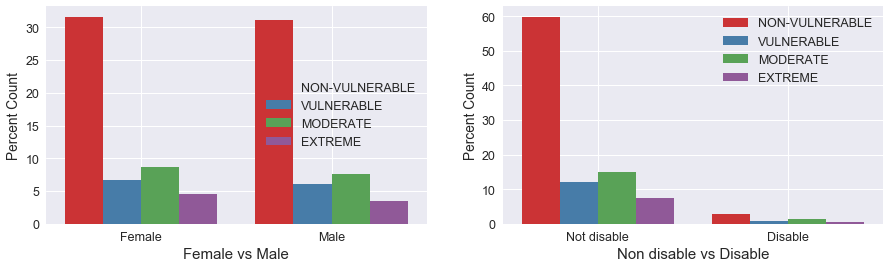

In [7]:
#males and females, dis
def distibute_male_female_dis(feature, t1,t2,col):
    sns.set(style="dark",font_scale=1.25)
    plt.subplot(1, 2, col)  
    ax = sns.barplot(x=feature, y= feature, data = train, hue = 'Target', palette = 'Set1', estimator=lambda x: len(x) / len(train) * 100);
    handles,_ = ax.get_legend_handles_labels()
    plt.xlabel(t1, fontsize = 15)
    ax.legend(handles, ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME'], loc = 'top');
    plt.xticks([0,1],t2, rotation = 0);
    plt.ylabel("Percent Count")
    plt.grid(True)

plt.figure(figsize = (15,4))
distibute_male_female_dis('male', "Female vs Male", ['Female', 'Male'],1)
distibute_male_female_dis('dis', "Non disable vs Disable", ['Not disable', 'Disable'],2)

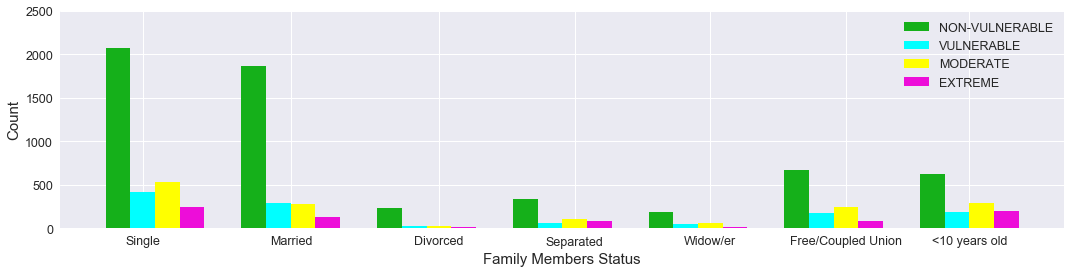

In [8]:
def FamilyStatus_distribution(col, i,dist):
    X = train[['Target', col]].groupby(['Target', col])
    data = X['Target'].agg('count').unstack('Target')  
    plt.bar(data.index[data.index==1] + dist, data[data.index==1][0], label = 'NON-VULNERABLE', color = 'xkcd:green', width=0.2);
    plt.bar(data.index[data.index==1] + dist+0.2, data[data.index==1][1], label = 'VULNERABLE', color = 'xkcd:cyan', width=0.2);
    plt.bar(data.index[data.index==1] + dist+0.4, data[data.index==1][2], label = 'MODERATE', color = 'yellow', width=0.2);
    plt.bar(data.index[data.index==1] + dist+0.6, data[data.index==1][3], label = 'EXTREME', color = 'xkcd:fuchsia', width=0.2);
    plt.grid(True)
    plt.ylim(0, 2500)

plt.figure(figsize = (18,4))   
family = {'estadocivil7': 'single','estadocivil3':'married','estadocivil4':'divorced', 'estadocivil5':'separated', 
          'estadocivil6': 'window/er','estadocivil2': 'free/coupled union','estadocivil1':'<10 years old' }

width = 0.1
for key,values in family.items():
    FamilyStatus_distribution(key, 1, width);
    width += 1.1
label = ['NON-VULNERABLE', 'VULNERABLE', 'MODERATE', 'EXTREME']
plt.legend(label)
plt.xlabel("Family Members Status", fontsize = 15);
plt.ylabel("Count", fontsize = 15);
plt.xticks([1.3,2.5,3.7,4.8,5.9,7.0, 8.0], ['Single', 'Married', 'Divorced', 'Separated', 'Widow/er', 'Free/Coupled Union', '<10 years old']);

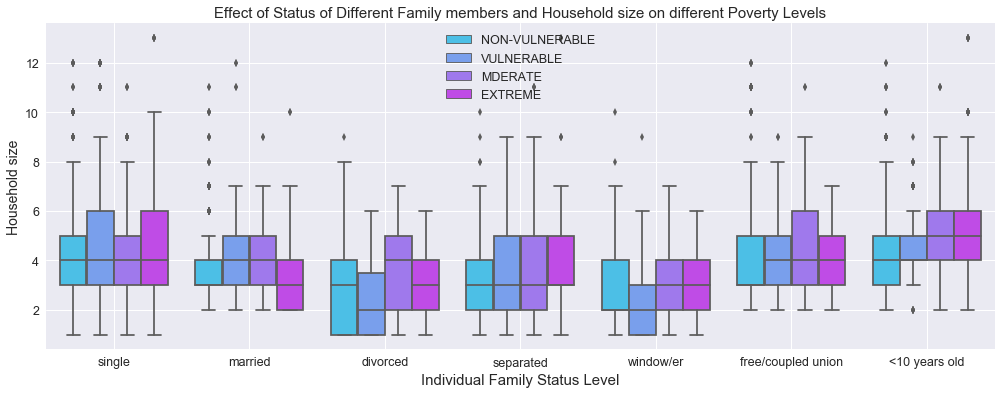

In [9]:
#status of family members on Poverty levels in households
def statusFamilyMembers_poverty(features, x, y, p):
    mergeData = []
    title = []
    i = 0
    status_family = pd.DataFrame()
    
    for key, values, in features.items():
        temp = train.loc[(train[key] == 1), [x, y]]
        status_family = pd.concat([status_family, temp], ignore_index = True, axis =  0)
        mergeData.append(len(temp))
        b = [values] * mergeData[i]
        title.extend(b)
        i += 1

    ax = sns.boxplot(x = title, y = status_family[x], hue = status_family[y], palette = p);
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ["NON-VULNERABLE", "VULNERABLE", 'MDERATE', 'EXTREME']);
    plt.grid(True);
  
family = {'estadocivil7': 'single','estadocivil3':'married','estadocivil4':'divorced', 'estadocivil5':'separated', 
          'estadocivil6': 'window/er','estadocivil2': 'free/coupled union','estadocivil1':'<10 years old' }

plt.figure(1, figsize = (17,6))
statusFamilyMembers_poverty(family, 'tamhog', 'Target', "cool")
plt.xlabel("Individual Family Status Level", fontsize = 15)
plt.ylabel("Household size" ,fontsize = 14)
plt.title("Effect of Status of Different Family members and Household size on different Poverty Levels", fontsize = 15);

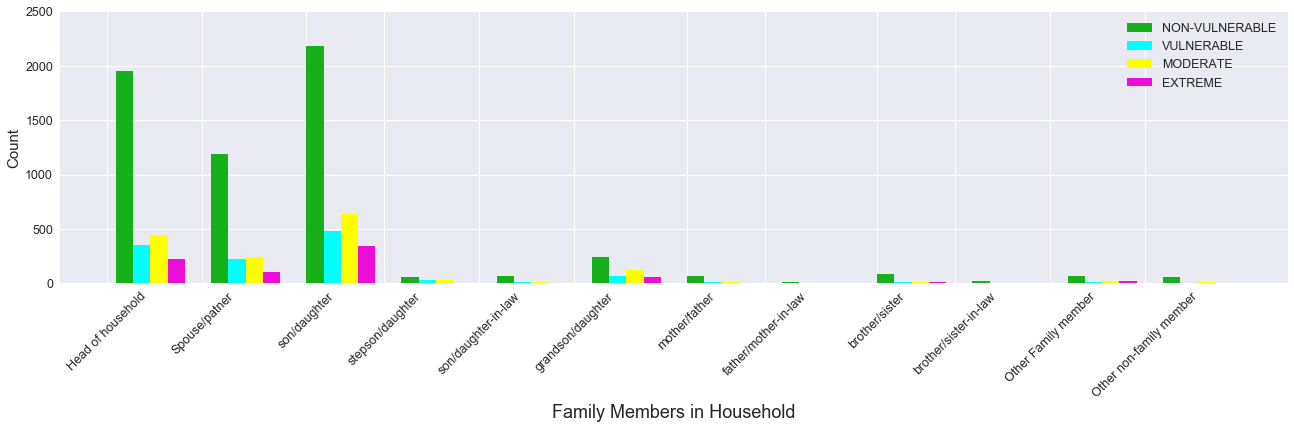

In [10]:
family_mem = {'parentesco1':'Head of household', 'parentesco2':'Spouse/patner', 'parentesco3':'son/daughter', 'parentesco4':'stepson/daughter',
                 'parentesco5':'son/daughter-in-law', 'parentesco6':'grandson/daughter', 'parentesco7':'mother/father',
                 'parentesco8': 'father/mother-in-law', 'parentesco9':'brother/sister', 'parentesco10': 'brother/sister-in-law',
                 'parentesco11': 'Other Family member', 'parentesco12': 'Other non-family member'}

plt.figure(figsize = (22,5)) 
width = 0.1
for key,values in family_mem.items():
    FamilyStatus_distribution(key, 1, width);
    width += 1.1
label = ['NON-VULNERABLE', 'VULNERABLE', 'MODERATE', 'EXTREME']
plt.legend(label)
plt.xlabel("Family Members in Household", fontsize = 18);
plt.ylabel("Count", fontsize = 15);
plt.xticks([0.9, 2, 3.2, 4.1,5.2,6.3, 7.6, 8.5, 9.8, 10.7, 11.8,12.9], list(family_mem.values()), rotation = 45);


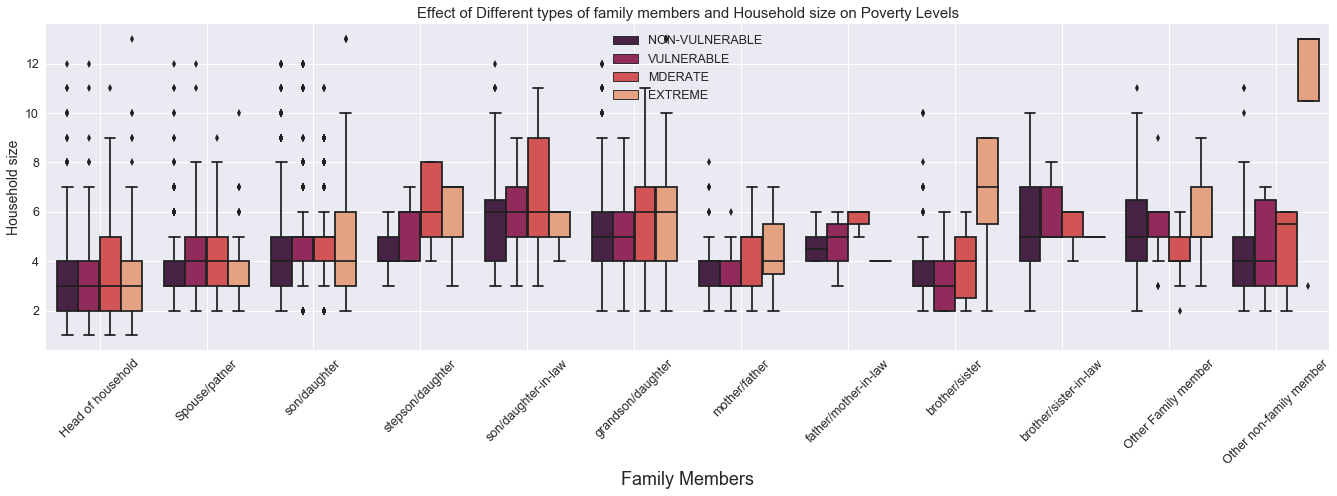

In [11]:
plt.figure(1, figsize = (23,6))
statusFamilyMembers_poverty(family_mem, 'tamhog', 'Target', "rocket")
plt.xlabel("Family Members", fontsize = 18)
plt.ylabel("Household size" ,fontsize = 14)
plt.xticks(rotation = 45)
plt.title("Effect of Different types of family members and Household size on Poverty Levels", fontsize = 15);

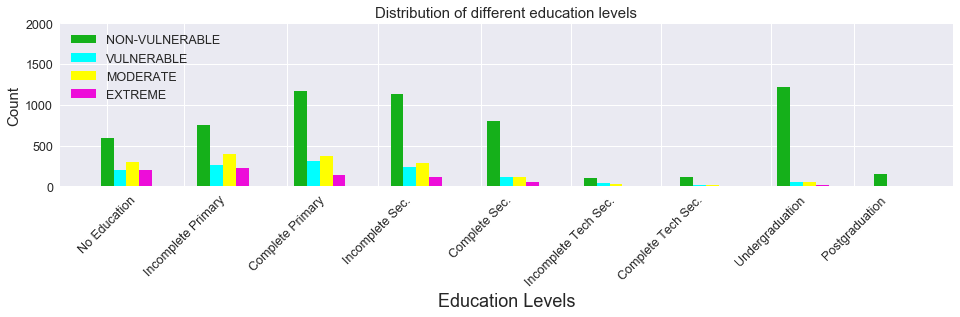

In [12]:
#education on poverty

edu_levels = {"instlevel1": "No Education", "instlevel2": "Incomplete Primary", "instlevel3": "Complete Primary", 
"instlevel4": "Incomplete Sec.", "instlevel5": "Complete Sec.", "instlevel6": "Incomplete Tech Sec.",
"instlevel7": "Complete Tech Sec.", "instlevel8": "Undergraduation", "instlevel9": "Postgraduation"}

plt.figure(figsize = (16,3)) 
width = 0.2
for key,values in edu_levels.items():
    FamilyStatus_distribution(key, 1, width);
    width += 1.5
label = ['NON-VULNERABLE', 'VULNERABLE', 'MODERATE', 'EXTREME']
plt.legend(label)
plt.xlabel("Education Levels", fontsize = 18);
plt.ylabel("Count", fontsize = 15);
plt.ylim(0, 2000)
plt.xticks([1.2, 2.4, 4, 5.4, 7,8.4, 9.8, 11.5, 12.8], list(edu_levels.values()), rotation = 45);
plt.title("Distribution of different education levels");


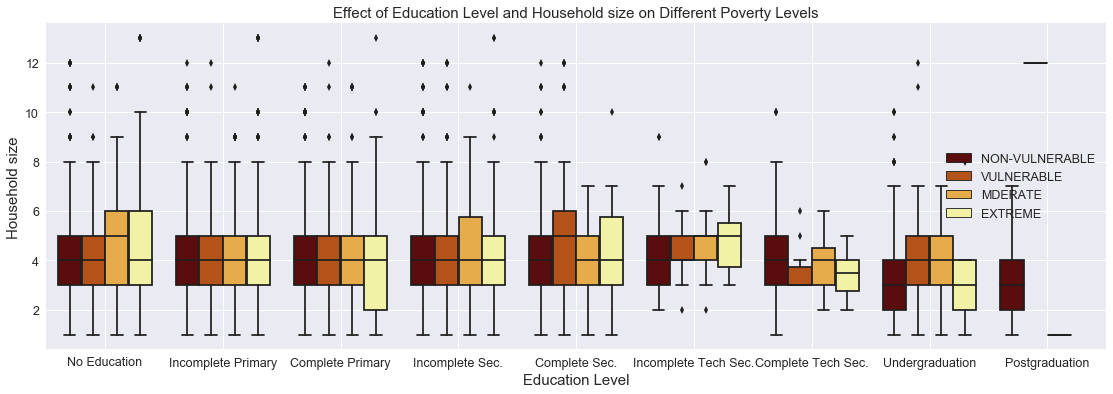

In [13]:
plt.figure(1, figsize = (19,6))
statusFamilyMembers_poverty(edu_levels, 'tamhog', 'Target', "afmhot")
plt.xlabel("Education Level", fontsize = 15)
plt.ylabel("Household size" ,fontsize = 15)
plt.title("Effect of Education Level and Household size on Different Poverty Levels", fontsize = 15);

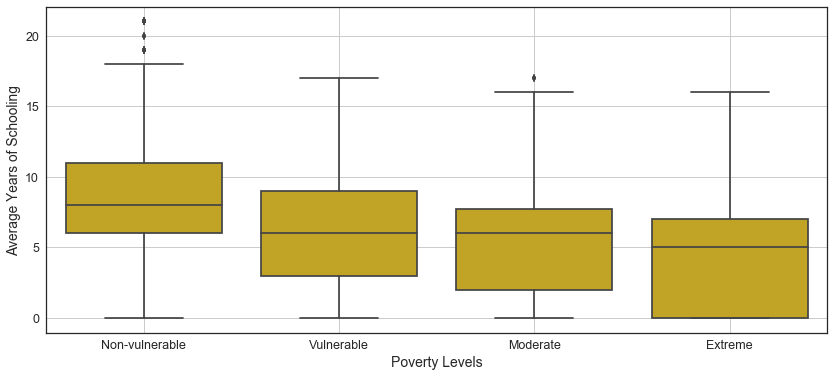

In [14]:
#edjefe, edjefa, escolari: years of schooling, meaneduc: avg years of schooling for adullts
sns.set_style('white')
plt.figure(figsize = (14,6))
#plt.subplot(1,2,1)
sns.boxplot(train.Target, train.escolari, color = 'xkcd:gold');
plt.grid(True)
plt.xlabel("Poverty Levels", fontsize = 14)
plt.ylabel("Average Years of Schooling")
plt.xticks([0,1,2,3],['Non-vulnerable', 'Vulnerable', 'Moderate', 'Extreme']);
plt.savefig("avg_years_schooling.png")

#plt.subplot(1,2,2)
# sns.boxplot(train.Target, train.meaneduc, palette = 'Oranges');
# plt.grid(True)
# plt.xlabel("")
# plt.ylabel("Avg. years of education for adults")
# plt.xticks([-0.2,0.8,1.8,2.8],['Non-vulnerable', 'Vulnerable', 'Moderate', 'Extreme'], rotation = 45);



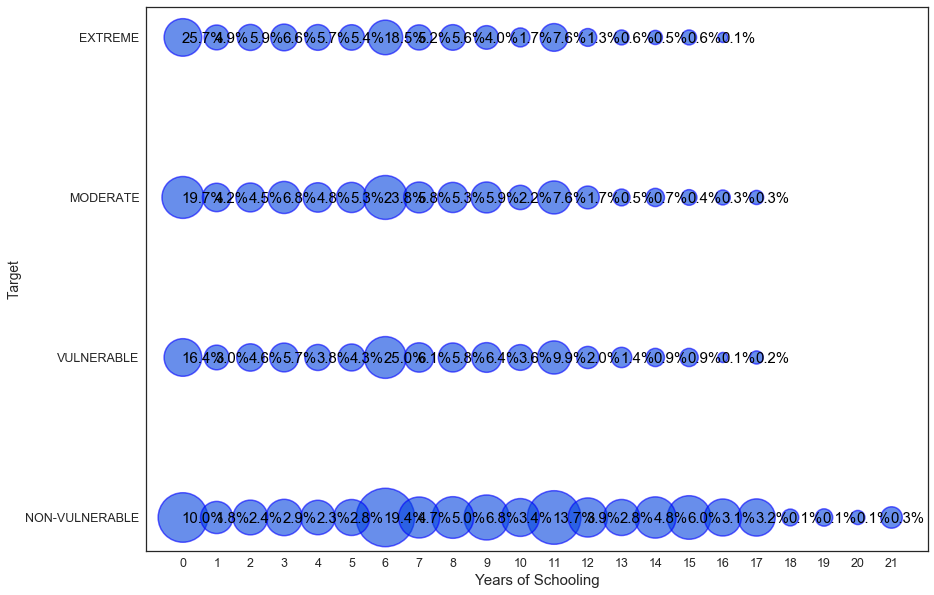

In [15]:
#REFERENCE:     https://python-graph-gallery.com/271-custom-your-bubble-plot/
def plot_bubblePlot(x,y, color):
    
    #group data based on Target variable
    data_unnormalized  = train.groupby(y)[x].value_counts(normalize = False)
    data_unnormalized = data_unnormalized.rename(columns = {x: 'raw_count'}).reset_index()

    #nomrmalized the data based on Target
    data_normalized = train.groupby(y)[x].value_counts(normalize = True)
    data_normalized = data_normalized.rename(columns = {x: 'normalized_values'}).reset_index()
    data_normalized['percentage'] = 100 * data_normalized[0]
    data_normalized['raw_count'] = list(data_unnormalized[0])

    plt.figure(figsize = (14, 10))
       

    # Scatter plot sized by percent
    plt.scatter(data_normalized[x], data_normalized[y], edgecolor = 'b',color = color,
                    s = 100 * np.sqrt(data_normalized['raw_count']), marker = 'o',
                    alpha = 0.6, linewidth = 1.5);


    #adjust x and y ticks 
    plt.yticks(data_normalized[y].unique())
    plt.yticks([0,1,2,3], label)
    plt.xticks(data_normalized[x].unique())
    
    
    if True:
        #annotate the graph
        for i, row in data_normalized.iterrows():
                # setting offsets
                plt.annotate(xy= (row[x] - (1 / data_normalized[x].nunique()), 
                                   row[y] - (0.15 / data_normalized[y].nunique())),
                             color = 'black',
                             s = f"{round(row['percentage'], 1)}%")
                
plot_bubblePlot('escolari', 'Target', 'xkcd:blue')
plt.ylabel("Target")
plt.xlabel("Years of Schooling", fontsize = 15);


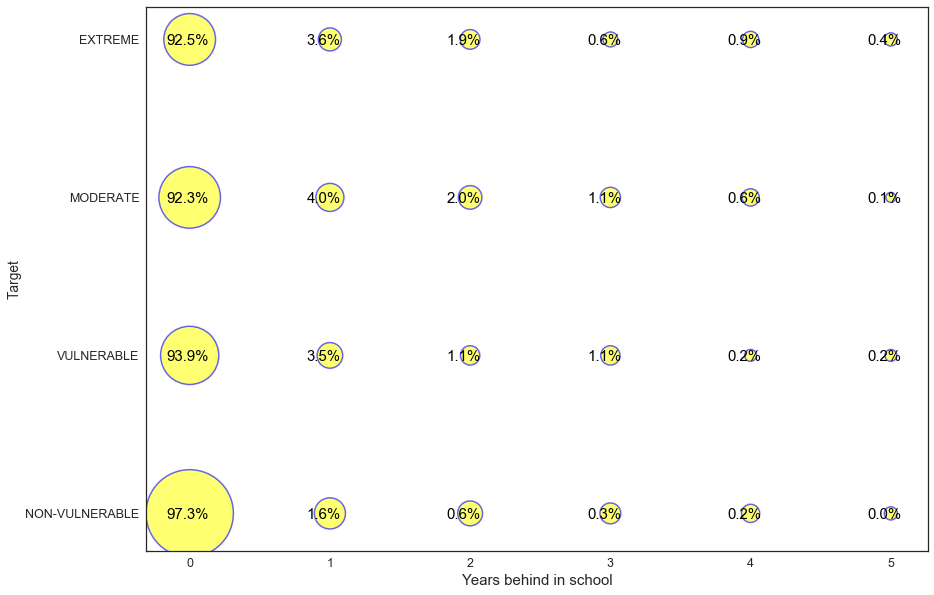

In [16]:
#rez_esc: years behind in school
plot_bubblePlot('rez_esc','Target', 'xkcd:yellow')
plt.ylabel("Target")
plt.xlabel("Years behind in school", fontsize = 15);

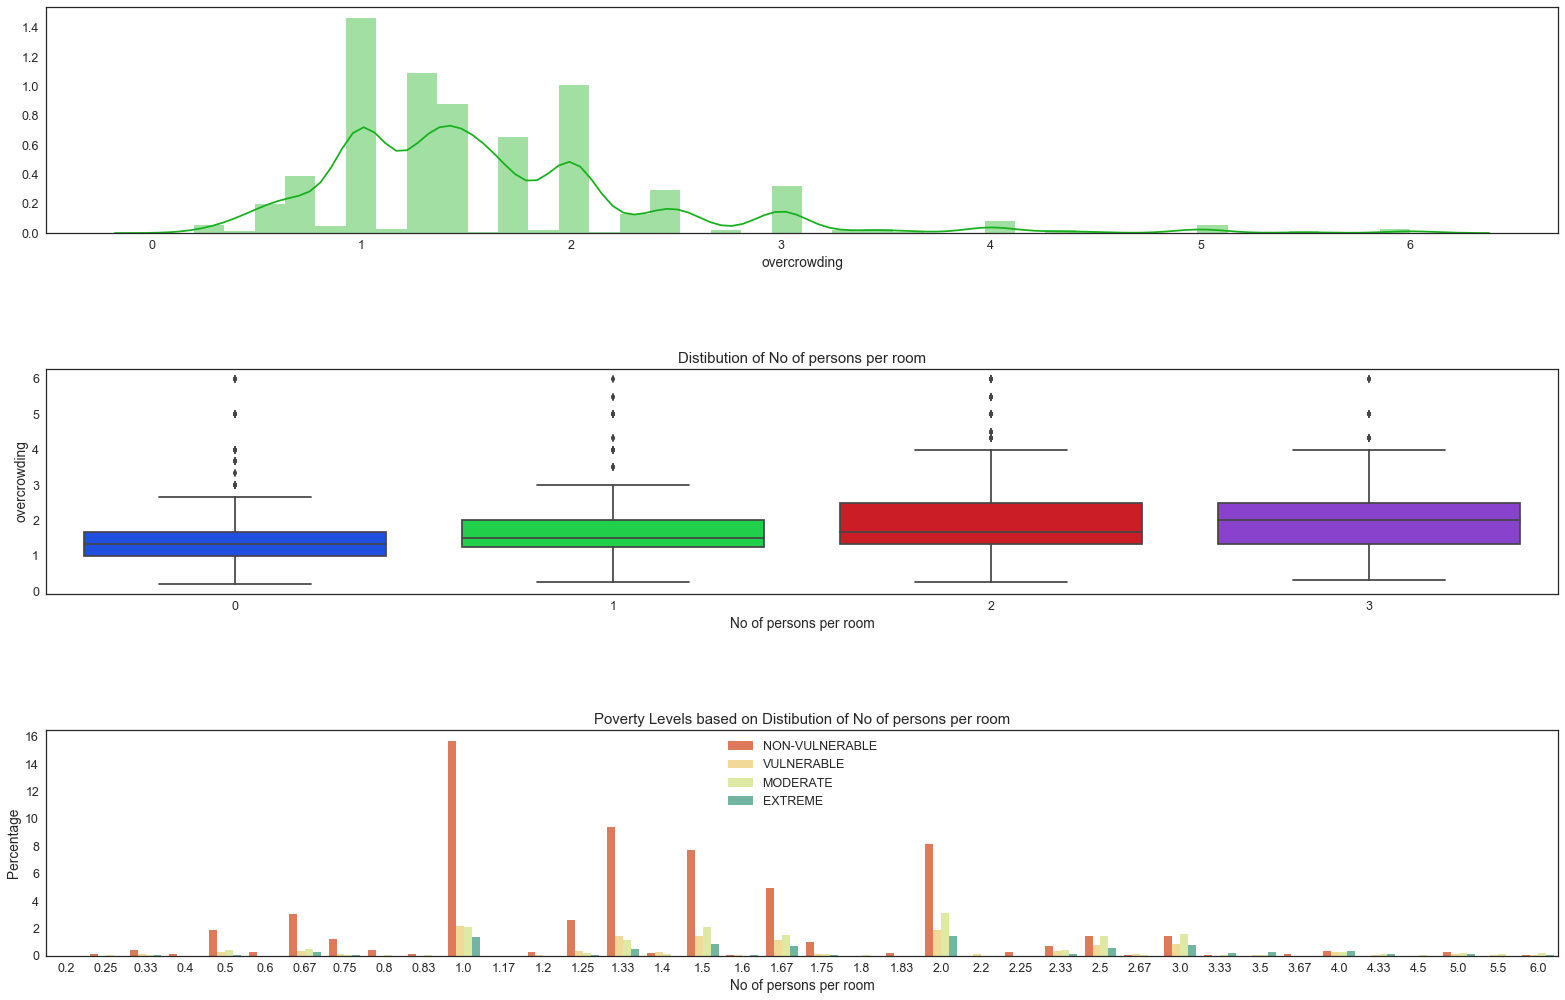

In [17]:
#overcrowding: no of persons per room
plt.figure(figsize = (30,17))
plt.subplot(3, 1, 1)
sns.distplot(train.overcrowding, bins = 40, color = 'xkcd:green')


plt.subplot(3, 1, 2)
sns.boxplot(x = train.Target, y = round(train.overcrowding,2), palette = 'bright')
plt.xlabel('No of persons per room')
plt.title("Distibution of No of persons per room")
    
plt.subplot(3, 1, 3)
ax = sns.barplot(x= round(train.overcrowding,2), y= 'overcrowding', hue='Target', data = train, estimator=lambda x: len(x) / len(train) * 100, palette = 'Spectral');
handles,_ = ax.get_legend_handles_labels()
plt.xlabel('No of persons per room')
plt.ylabel("Percentage")
plt.title("Poverty Levels based on Distibution of No of persons per room")
ax.legend(handles, ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME']);



plt.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.6, top=0.9);


In [18]:
label = ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME']

def peopleDistribution(xlabel, ylabel, palette1, palette2, t1):
    plt.figure(figsize = (14,6)) 
#     plt.subplot(1,2,1)
#     sns.distplot(train[xlabel], bins = 20, color=palette1);
#     plt.grid(True)
#     plt.xlabel(t1)
#     plt.title(t1);

    #plt.subplot(1,2,2)
    sns.violinplot(x = train[ylabel], y = train[xlabel], color = "red");
    plt.xticks([0,1,2,3], label, rotation = 0)
    plt.xlabel("Poverty Levels", fontsize = 14)
    #plt.ylabel("Number of people living in the house", fontsize = 14)
    plt.ylabel("Number of bedrooms in the house", fontsize = 14)
    plt.grid(True)
    plt.title(t1);
    plt.savefig("no_bedrooms.png")

#peopleDistribution('tamviv', 'Target', 'green', 'YlOrRd', ' ')

ValueError: Vega20c is not a valid palette name

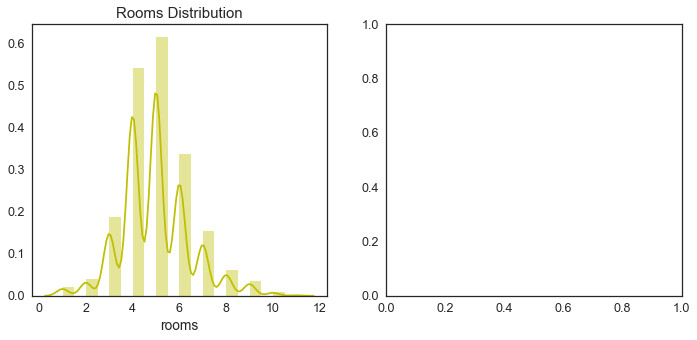

In [19]:
#rooms in the household

plt.figure(figsize = (18,5)) 
plt.subplot(1,3,1)
sns.distplot(train.rooms, bins = 20, color="y");
plt.title("Rooms Distribution");

plt.subplot(1,3,2)
sns.boxplot(x = train.Target, y = train.rooms, palette = "Vega20c");
plt.xticks([-0.5,0.6,1.8,2.7], ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME'], rotation = 45)
plt.title("Rooms Distribution")

plt.subplot(1,3,3)
plt.suptitle('Rooms Distribution', fontsize=16)
ax = sns.barplot(x= 'rooms', y= 'rooms', hue='Target', data = train, estimator=lambda x: len(x) / len(train) * 100, palette = "hsv");
handles,_ = ax.get_legend_handles_labels()
plt.xlabel("No of Rooms")
plt.ylabel("Percentage")
plt.title("Poverty Levels based on Distibution of rooms")
ax.legend(handles, ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME'], loc= 'upper right');

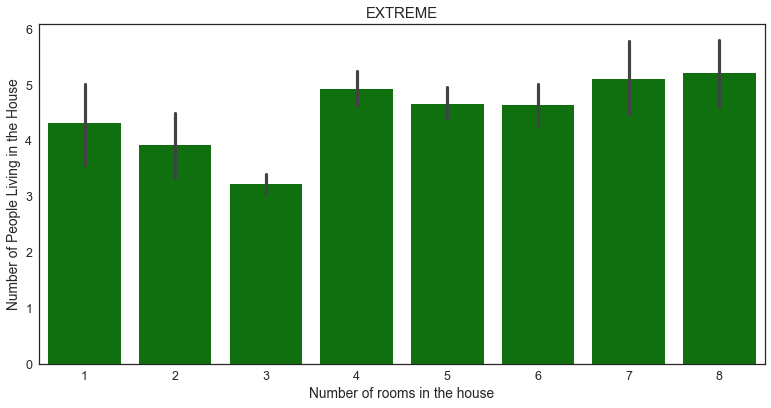

In [20]:
#Number Rooms in house Vs No of People in the house
label = ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME']
def roomsPeople_distribution(xlabel,ylabel):
    for index in range(0,1):
        subsetTrain = train[train.Target == 3]
        #plt.subplot(1, 4, index+1)
        sns.barplot(x = subsetTrain[xlabel], y = subsetTrain[ylabel], color = color[3]);
        plt.title(label[3])
        plt.ylabel("Number of People Living in the House")
        plt.xlabel("Number of rooms in the house")



plt.figure(1, figsize = (13,7))
#plt.suptitle('Effect of no of rooms and person living in the house on the poverty', fontsize=16)
color = ["red", 'blue', 'orange', 'green']
roomsPeople_distribution('rooms', 'tamviv');
plt.savefig("no_rooms_people_3.png")
plt.subplots_adjust(top=0.8)
    

"""
ValueError: Colormap BlueS_G is not recognized. Possible values are: 
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, 
Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, 
PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, 
PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, 
RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, 
Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, 
YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, 
cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, g
ist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, 
gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, 
hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral,
nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, 
rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, 
tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

"""

In [ ]:
#overcrowding, # persons per room


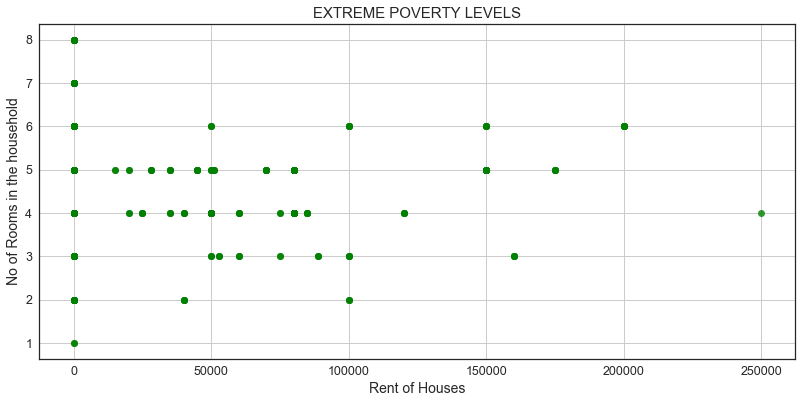

In [27]:
#rooms and rent-payment 
label = ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME']
color = ["red", 'blue', 'orange', 'green']
def roomsRent_distribution(xlabel,ylabel):
    #for index in range(len(label)):
        subsetTrain = train[train.Target == 3]
        #plt.subplot(2, 2, index+1)
        sns.regplot(x = subsetTrain[xlabel], y = subsetTrain[ylabel], fit_reg = False, color = color[3]);
        plt.grid(True)
        plt.title(label[3] + " POVERTY LEVELS")
        plt.xlabel("Rent of Houses", fontsize = 14)
        plt.ylabel("No of Rooms in the household", fontsize = 14)

plt.figure(1, figsize = (15,6))
#plt.suptitle('No of Rooms in house vs rent payment for different poverty levels', fontsize=16)
roomsRent_distribution('v2a1', 'rooms')
plt.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.6, top=0.9);
plt.savefig("rent_distribution_3.png")

In [ ]:
#bedrooms distribution
peopleDistribution('bedrooms', 'Target', 'red', 'inferno','')

In [ ]:
#types of rent distrbution

rent_types = {"tipovivi1": "Owned & Fully paid", "tipovivi2": "Paying installments", "tipovivi3": "Rented", 
"tipovivi4": "Precarious", "tipovivi5": "Other"}

plt.figure(figsize = (9,3)) 
width = 0.2
for key,values in rent_types.items():
    FamilyStatus_distribution(key, 1, width);
    width += 1.5
label = ['NON-VULNERABLE', 'VULNERABLE', 'MODERATE', 'EXTREME']
plt.legend(label, loc= 'center right')
plt.xlabel("Types of Rents", fontsize = 18);
plt.ylabel("Count", fontsize = 15);
plt.ylim(0, 4000)
plt.xticks([0.7, 1.8, 4.2, 5.4, 7,8.4, 9.8, 11.5, 12.8], list(rent_types.values()), rotation = 45);
plt.title("Different Types of Rent Options");


In [ ]:
#rent distrbution
def distribution_rent(train):
    sns.set(style="white", font_scale=1.2)  #setting style and the palette
    sns.set_palette("dark")

    plt.figure(1, figsize = (18,8))
    plt.suptitle('Distribution of Montly Rent Payment by Different Housholds', fontsize=16)

    plt.subplot(2, 2, 1)
    ax = sns.distplot(train.loc[(train.Target == 0), 'v2a1'].dropna(), color = 'y')
    plt.title("Not Vulnerable to Poverty")
    plt.xlabel("Rent Amount")
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    ax = sns.distplot(train.loc[(train.Target == 1), 'v2a1'].dropna(), color = 'b', bins=30)
    plt.title("Vulnerable to Poverty")
    plt.xlabel("Rent Amount")
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    ax = sns.distplot(train.loc[(train.Target == 2), 'v2a1'].dropna(), color = 'g', bins=30)
    plt.title("Moderate Poverty")
    plt.xlabel("Rent Amount")
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    ax = sns.distplot(train.loc[(train.Target == 3), 'v2a1'].dropna(), color = 'r', bins=30)
    plt.title("Extreme Poverty");
    plt.xlabel("Rent Amount")
    plt.grid(True)
    
    plt.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.5, top=0.9);
 
distribution_rent(train)

In [ ]:
#size of house and rent (tamhog, v2a1)
label = ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME']
color = ["xkcd:green", 'xkcd:red', 'xkcd:blue', 'xkcd:orange']
def sizeRent_distribution(xlabel,ylabel):
    for index in range(len(label)):
        subsetTrain = train[train.Target == index]
        plt.subplot(2, 2, index+1)
        sns.regplot(x = subsetTrain[xlabel], y = subsetTrain[ylabel], fit_reg = False, color = color[index]);
        plt.grid(True)
        plt.title(label[index])
        plt.xlabel("House Rent")
        plt.ylabel("Size of Household")

plt.figure(1, figsize = (22,8))
plt.suptitle('Household size vs rent payment for different poverty levels', fontsize=16)
sizeRent_distribution('v2a1', 'tamhog')
plt.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.6, top=0.9);


In [ ]:
#age of house
peopleDistribution('age', 'Target', 'xkcd:goldenrod', 'seismic_r','Age of House Distribution');

In [ ]:
#age of house and rent distribution

label = ["NON-VULNERABLE", "VULNERABLE", 'MODERATE', 'EXTREME']
color = ["xkcd:teal", 'xkcd:tomato', 'xkcd:indigo', 'xkcd:orange']
def ageRent_distribution(xlabel,ylabel):
    for index in range(len(label)):
        subsetTrain = train[train.Target == index]
        plt.subplot(2, 2, index+1)
        sns.regplot(x = subsetTrain[xlabel], y = subsetTrain[ylabel], fit_reg = False, color = color[index]);
        plt.grid(True)
        plt.title(label[index])
        plt.xlabel("House Rent")
        plt.ylabel("Age of Household")

plt.figure(1, figsize = (22,8))
plt.suptitle('Age of House vs rent payment for different poverty levels', fontsize=16)
ageRent_distribution('v2a1', 'age')
plt.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.6, top=0.9);


In [ ]:
#poverty rular/urban

plt.figure(figsize = (20,5))
distibute_male_female_dis('area1', "Rular vs Urban", ['Rular', 'Urban'],1)


In [ ]:
#region in Costa Rica
plt.figure(figsize = (18,4))   
regions = {'lugar1': 'Central','lugar2':'Chorotega','lugar3':'PacÃƒÂfico Central', 'lugar4':'Brunca', 
          'lugar5': 'Huetar AtlÃƒÂ¡ntica','lugar6': 'Huetar Norte'}

width = 0.1
for key,values in regions.items():
    FamilyStatus_distribution(key, 1, width);
    width += 1.1
plt.ylim(0, 4500)
label = ['NON-VULNERABLE', 'VULNERABLE', 'MODERATE', 'EXTREME']
plt.legend(label)
plt.title("Distribution of poverty across different regions in Latin America")
plt.xlabel("Different Regions", fontsize = 15);
plt.ylabel("Count", fontsize = 15);
plt.xticks([1.3,2.5,3.7,4.8,5.9,7.0, 8.0], list(regions.values()));

In [ ]:
import time

from sklearn.manifold import TSNE

temp_train = train
#temp_train
#temp_train.drop(columns = ['Id', 'idhogar', 'v2a1', 'rez_esc'], inplace = True)
#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
x_data = temp_train.iloc[:, 0:temp_train.shape[1]-1]
y_data = temp_train['Target']

tsne_results = tsne.fit_transform(x_data)

In [ ]:
tsne_results

In [ ]:
vis_x = tsne_results[:, 0]
vis_y = tsne_results[:, 1]


plt.figure(figsize = (20,5))
plt.scatter(vis_x, vis_y, c = y_data, cmap=plt.cm.get_cmap("Set3",4))
plt.colorbar(ticks=range(4))
# plt.clim(-0.5, 9.5)
plt.show();



In [ ]:
#PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(temp_train)

In [ ]:
pca_result

In [ ]:
plt.figure(figsize = (20,5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.2)
plt.show();

In [ ]:
#Tsne and pca


#PCA 50
pca = PCA(n_components=50)
pca_result50 = pca.fit_transform(temp_train)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_pca_results = tsne.fit_transform(pca_result50)

In [ ]:
vis_x = tsne_pca_results[:, 0]
vis_y = tsne_pca_results[:, 1]


plt.figure(figsize = (20,5))
plt.scatter(vis_x, vis_y, c = y_data, cmap=plt.cm.get_cmap("Set3",4))
plt.colorbar(ticks=range(4))
# plt.clim(-0.5, 9.5)
plt.show();